# Projeto 3 - Ciência dos Dados

# Ciência dos Dados 2019

### Alunos:
- Felipe Junqueira
- Giovana Campedelli
- Gabriela Choichit
- João Roxo

### Link para base de dados:

- https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame


A partir da base de dados coletada vamos usar a biblioteca ''scikit-learn'' para assim usufruir da técnica Naive Bases para classificação, no caso do jogo da velha: o resultado do jogo, e no caso da fertilidade: ver se a fertilidade esta alterada ou não. 

Feita a primeira análise vamos utilizar de outros algorítimos para classifica-los novamente e assim comparar os resultados obtidos.

Finalmente obteremos o resultado previsto e o melhor algoritmo para prever o resultado.

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import preprocessing


In [3]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [4]:
x= ['top-left','top-middle','top-right','middle-left','middle-middle','middle-right','bottom-left','bottom-middle','bottom-right','class']


dados_velha = pd.read_excel('tic-tac-toe.xlsx', header=None, names=x)
dados_velha.head()


,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [5]:
feature_cols = ['top-left','top-middle','top-right','middle-left','middle-middle','middle-right','bottom-left','bottom-middle','bottom-right']
X = dados_velha[feature_cols] #features
y = dados_velha['class']

In [6]:
dv = X.copy()

In [7]:
for f in feature_cols:
    dv = dummify(dv, f)

In [8]:
dv.head()

,top-left_b,top-left_o,top-left_x,top-middle_b,top-middle_o,top-middle_x,top-right_b,top-right_o,top-right_x,middle-left_b,...,middle-right_x,bottom-left_b,bottom-left_o,bottom-left_x,bottom-middle_b,bottom-middle_o,bottom-middle_x,bottom-right_b,bottom-right_o,bottom-right_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(dv, y, test_size=0.25, random_state=1) # 75% training and 25% 

In [14]:
# Cria modelo.
model = Pipeline([
    ("classifier", MultinomialNB())
])

In [15]:
# Treina modelo.
#model = MultinomialNB()
m = model.fit(X_train, y_train)
m

Pipeline(memory=None,
     steps=[('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [16]:
v = m.predict(X_test)

In [17]:
acc = accuracy_score(y_test, v)
print("Acurácia: {}".format(acc))

Acurácia: 0.7583333333333333


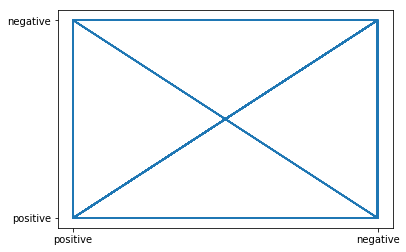

In [18]:
plt.plot(y_test, v)